# Getting started

This notebook will guide you through the document scans we have prepared.

In [1]:
# Import common utils and the scanner library.
import os, sys

from PIL import Image, ImageDraw

In [2]:
# Check, and optionally configure, input and output directory.
import config
print(config.INPUT_DIRECTORY)
print(config.WRITE_DIRECTORY)

/Users/kevino/code/LearningEquality/curriculum-scanner/inputs
scans


In [3]:
files = os.listdir(config.INPUT_DIRECTORY)
files

['Focus 2. KICD business studies curriculum.pdf',
 'Focus 1. KICD secondary syllabus volume IV - Computer Skills.pdf',
 'Focus 3e. Excerpt from Kenya life skills.pdf',
 'Chemistry textbook TOC I.pdf',
 'KICD business studies teacher handbook.pdf',
 'Chemistry textbook TOC H.pdf',
 'NCDC Uganda Chemistry.pdf',
 'Focus 3. Kenya life skills.pdf',
 'Focus 1e. Excerpt from KICD secondary syllabus volume IV.pdf',
 'KICD secondary curriculum volume II.pdf',
 'NCDC Uganda Biology.pdf',
 'Focus 5. KICD biology.pdf',
 'Focus 2e. Excerpt from KICD business studies curriculum.pdf',
 'KICD secondary syllabus volume IV.pdf',
 'Chemistry textbook TOC C.pdf',
 'Chemistry textbook TOC B.pdf',
 'Chemistry textbook TOC A.pdf',
 'Chemistry textbook TOC E.pdf',
 'Chemistry textbook TOC D.pdf',
 'Chemistry textbook TOC F.pdf',
 'Focus 4. KICD chemistry.pdf',
 'Chemistry textbook TOC G.pdf']

## Helper class

In [4]:
from scanner import CurriculumScanner

In [5]:
doc = CurriculumScanner('inputs/KICD secondary curriculum volume II.pdf')

In [6]:
num_pages = len(doc.pages)
num_pages

88

In [11]:
# Each page in the document contains:
#  image = source image
#  file = JSON OCR data
#  boxes = an image file with the recognized boxes shown
page_num = 21
page = doc.pages[page_num]
page

{'columns': [[83.0, 1108]],
 'file': 'scans/KICD secondary curriculum volume II-d49232f1ab0fb901ebfa4abb47a9ed73/21/KICD secondary curriculum volume II-d49232f1ab0fb901ebfa4abb47a9ed73-21_ocr.json',
 'image': 'scans/KICD secondary curriculum volume II-d49232f1ab0fb901ebfa4abb47a9ed73/21/KICD secondary curriculum volume II-d49232f1ab0fb901ebfa4abb47a9ed73-21.png',
 'boxes': 'scans/KICD secondary curriculum volume II-d49232f1ab0fb901ebfa4abb47a9ed73/21/KICD secondary curriculum volume II-d49232f1ab0fb901ebfa4abb47a9ed73-21_boxes.png'}

### Image

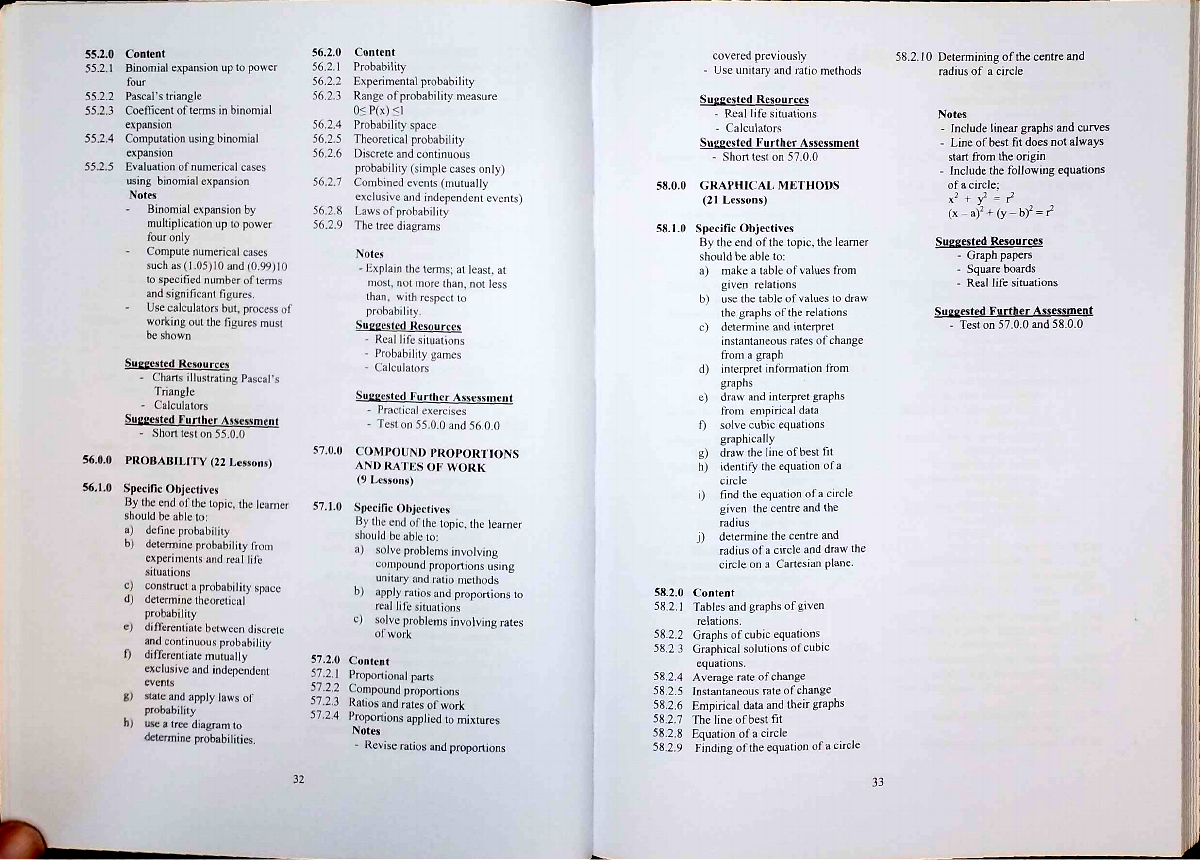

In [12]:
page_image = doc.get_page_image(page_num)
page_image

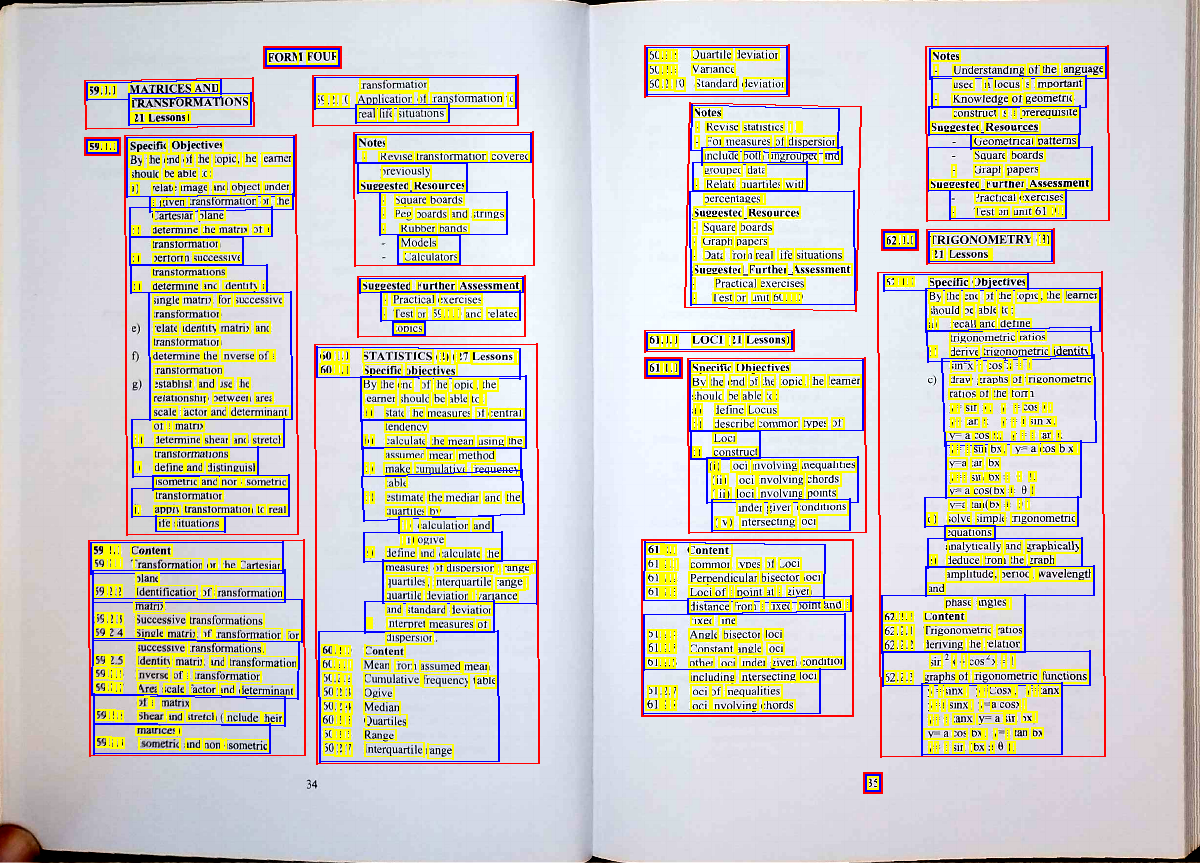

In [9]:
# To see the boxes
doc.draw_boxes(page_num)

### Page data

In [10]:
# get the blocks in (hopefully) logical order
page_data = doc.get_lines_for_blocks(page_num, columns=4)
block_num = 0
for block in page_data:
    for lines in block['lines']:
        text = ''
        for line in lines:
            text += line['text']
    print("Index: {}, Text: {}".format(block_num, block['text']))
    # print("text: {}".format(text))
    block_num += 1


start = 268
text = FORM FOUR

Column = 1
start = 649
text = 60.2.8 Quartile deviation 60.2.9 Variance 60.2.10 Standard deviation

Column = 2
start = 89
text = 59.0.0 MATRICES AND
TRANSFORMATIONS (21 Lessons)

Column = 0
start = 317
text = transformation 59.2.10 Application of transformation to
real life situations

Column = 1
start = 89
text = 59.1.0

Column = 0
start = 358
text = Notes - Revise transformation covered
previously Suggested Resources
- Square boards • Peg boards and strings · Rubber bands
Models Calculators

Column = 1
start = 930
text = Notes - Understanding of the language
used in locus is important - Knowledge of geometric
construct is a prerequisite Suggested Resources
Geometrical patterns
Square boards - Graph papers Suggested Further Assessment
Practical exercises - Test on unit 61.0.0

Column = 3
start = 694
text = Notes - Revise statistics (1) - For measures of dispersion
include both ungrouped and
grouped data - Reiate quartiles with
percentages. Suggested Resou

In [ ]:
# examine a block
block = page_data[21]
print(block.keys())
def get_coords(vertices):
    coords = {'x': 0, 'y': 0, 'width': 0, 'height': 0}
    num_verts = 4
    # vert 0 is top left
    coords['x'] = vertices[0]['x']
    coords['y'] = vertices[0]['y']
    coords['width'] = vertices[2]['x'] - vertices[0]['x']
    coords['height'] = vertices[2]['y'] - vertices[0]['y']
    
    return coords

# print(block['paragraphs'])
for para in block['paragraphs']:
    for word in para['words']:
        for symbol in word['symbols']:
            print(word['text'])
            print('coords: {}'.format(get_coords(word['bounding_box']['vertices'])))


In [ ]:
ablock = page_data['pages'][0]['blocks'][6]
print("Example block props:", ablock.keys())

In [ ]:
# blocks
num_blocks = len(page_data['pages'][0]['blocks'])
standards_start = -1
left_blocks = []
right_blocks = []
for index in range(num_blocks):
    block = page_data['pages'][0]['blocks'][index]
    # print("text = {}, bb = {}".format(block['text'], block['bounding_box']))
    
    if block['bounding_box']['vertices'][0]['x'] < 600:
        left_blocks.append(block)
    else:
        right_blocks.append(block)
        
for block in left_blocks + right_blocks:
    print(block['text'])

In [ ]:
print("index = {}".format(standards_start))

for index in range(standards_start, num_blocks):
    ablock = page_data['pages'][0]['blocks'][index]
    print('Block {} text={}'.format(index, ablock['text']))

In [ ]:
# paragraphs
aparagraph = page_data['pages'][0]['blocks'][6]['paragraphs'][0]
print("Example paragraph props:", aparagraph.keys())
print('Paragraph text=', aparagraph['text'])

In [ ]:
# words
aword = page_data['pages'][0]['blocks'][6]['paragraphs'][0]['words'][0]
print("Example word props:", aword.keys() )
print('Word text=', aword['text'])

In [ ]:
page_data['pages'][0]['blocks'][6]['paragraphs'][0]['words'][0].keys()

# Helper methods

### Find a paragraph that contains a given word

In [ ]:
page_image = doc.get_page_image(page_num)
matches = doc.find_text_matches('1.0.0', search_threshold=90)
print('found', len(matches), 'matches')
for match in matches:
    if match['page'] == page_num:
        print('match vertices=', match['bounding_box']['vertices'])
        print('match word', match['paragraph'])
        print("page = {}".format(match['page']))
        page_image = doc.draw_box(page_image, match['bounding_box'])

page_image


In [ ]:
# magic here to read text and convert into a topic tree of curriculum standards